In [70]:
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx
from music21 import stream, converter, instrument, tinyNotation, style

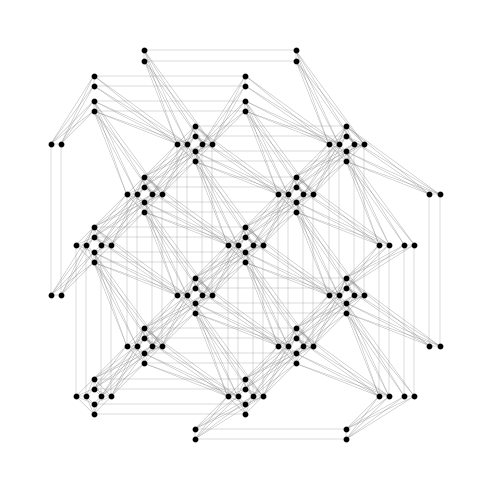

In [5]:
# Pegasus architecture

P = dnx.pegasus_graph(3)
#fig, ax = plt.subplots(layout="constrained")
dnx.draw_pegasus(P, with_labels=False, node_size = 10, width=0.2, crosses=True, node_color="black", edge_color="gray")
plt.gca().set_aspect('equal')
#plt.savefig("..\Figures\pegasus.pdf", pad_inches=0, bbox_inches="tight")

In [ ]:
class ColorModifier(tinyNotation.Modifier):
    def postParse(self, m21Obj):
        m21Obj.style.color = self.modifierData
        return m21Obj

tnc = tinyNotation.Converter()
tnc.modifierAngle = ColorModifier

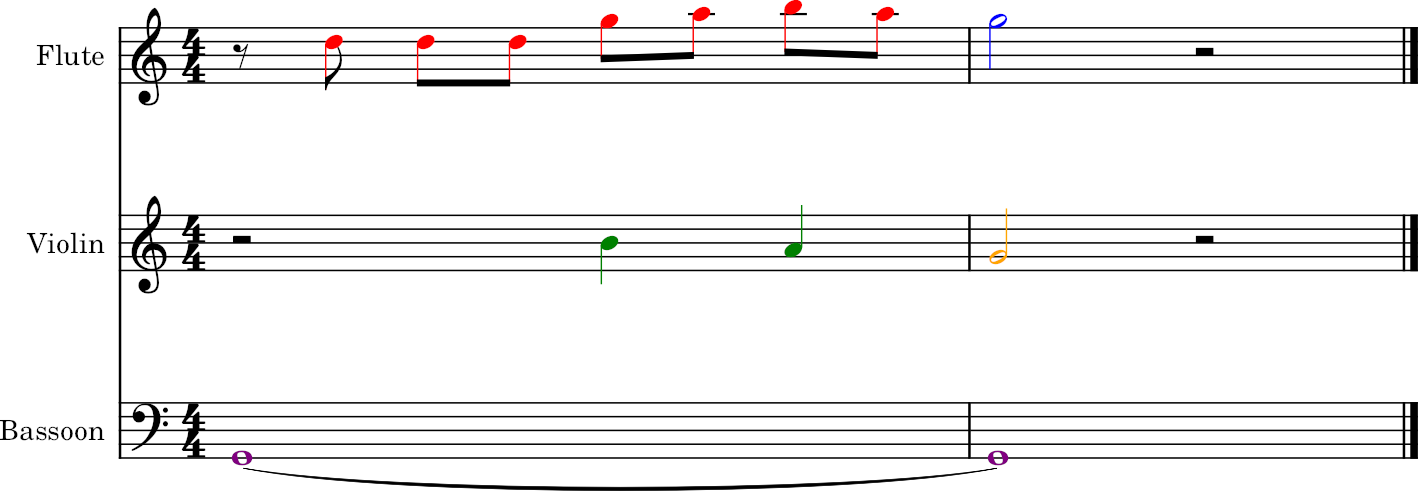

WindowsPath('c:/Users/Lucas/OneDrive - Durham University/PHYS4213/Figures/toy-1.png')

In [96]:
toy = stream.Score()

flute = converter.parse("tinyNotation: 4/4 r8 d' d' d' g' a' b' a' g'2 r")
for el in flute.flatten().getElementsByOffset(0.5,3.5):
    el.style.color = "red"
for el in flute.flatten().getElementsByOffset(4,5):
    el.style.color = "blue"
flute.insert(0,instrument.Flute())
toy.insert(0,flute)

violin = converter.parse("tinyNotation: 4/4 r2 b4 a4 g2 r")
for el in violin.flatten().getElementsByOffset(2,3):
    el.style.color = "green"
for el in violin.flatten().getElementsByOffset(4,5):
    el.style.color = "orange"
violin.insert(0,instrument.Violin())
toy.insert(0,violin)

bassoon = converter.parse("tinyNotation: 4/4 GG1~ GG1")
bassoon.insert(0,instrument.Bassoon())
for el in bassoon.flatten().notes:
    el.style.color = "purple"
toy.insert(0,bassoon)

toy.show()
#toy.write(fmt="musicxml.png", fp="../Figures/toy.png", dpi=300)

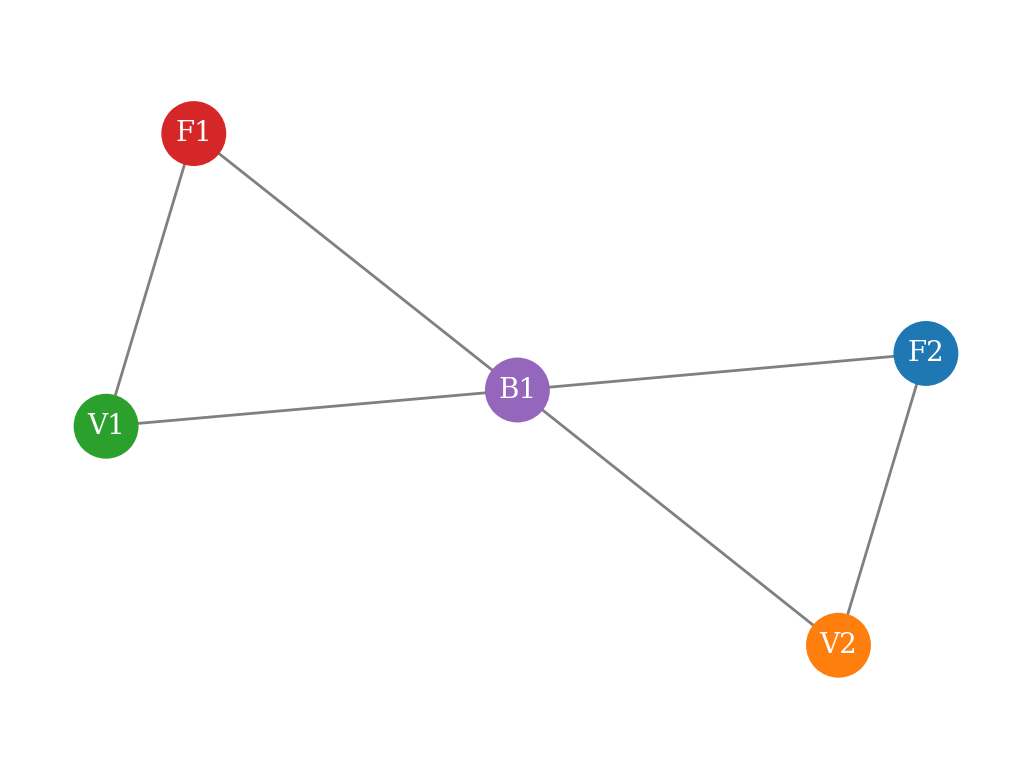

In [104]:
edges = [("F1","V1"), ("V1","B1"), ("F1","B1"), ("F2","V2"), ("V2","B1"), ("F2","B1")]

F = nx.Graph()
F.add_edges_from(edges)

colours = ["tab:red", "tab:green", "tab:purple", "tab:blue", "tab:orange"]

pos = nx.spring_layout(F, seed=1)
nx.draw_networkx(F, pos=pos, edge_color="grey", width=1, font_size=10, font_family="serif", font_color="white", node_size=500, node_color=colours, hide_ticks=True)
plt.gca().set_aspect("equal", "datalim")
plt.axis("off")
plt.savefig("..\Figures\\toy_graph.pdf", pad_inches=0, bbox_inches="tight")